# Data Exploration and Visualization about the Olympic Games

## Content

The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:

ID - Unique number for each athlete;
Name - Athlete's name;
Sex - M or F;
Age - Integer;
Height - In centimeters;
Weight - In kilograms;
Team - Team name;
NOC - National Olympic Committee 3-letter code;
Games - Year and season;
Year - Integer;
Season - Summer or Winter;
City - Host city;
Sport - Sport;
Event - Event;
Medal - Gold, Silver, Bronze, or NA.

## Importing Modules

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Datasets

In [97]:
data = pd.read_csv('athlete_events.csv')
regions = pd.read_csv('noc_regions.csv')

## Collecting introductory information about the data

In [98]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [99]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [101]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [102]:
regions.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,SRI,Germany,Virgin Islands
freq,1,4,1


In [103]:
regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
NOC       230 non-null object
region    227 non-null object
notes     21 non-null object
dtypes: object(3)
memory usage: 5.5+ KB


## Joining the dataframes

We can now join the two dataframes using as key the NOC column with the Pandas 'Merge' function.

In [104]:
combined = pd.merge(data,regions,on='NOC',how='left')

In [105]:
combined.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


## Distribution of age of gold medallists

 First creating a new dataframe including only gold medalists.

In [106]:
goldWinners = combined[combined['Medal']=='Gold']

Before plotting the age, we need to evaluate whether there are any null values. Let's take only the values that are different from NaN.

In [107]:
goldWinners.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
region     True
notes      True
dtype: bool

In [108]:
goldWinners = goldWinners[np.isfinite(goldWinners['Age'])]

Text(0.5,1,'Distribution of Gold Winners')

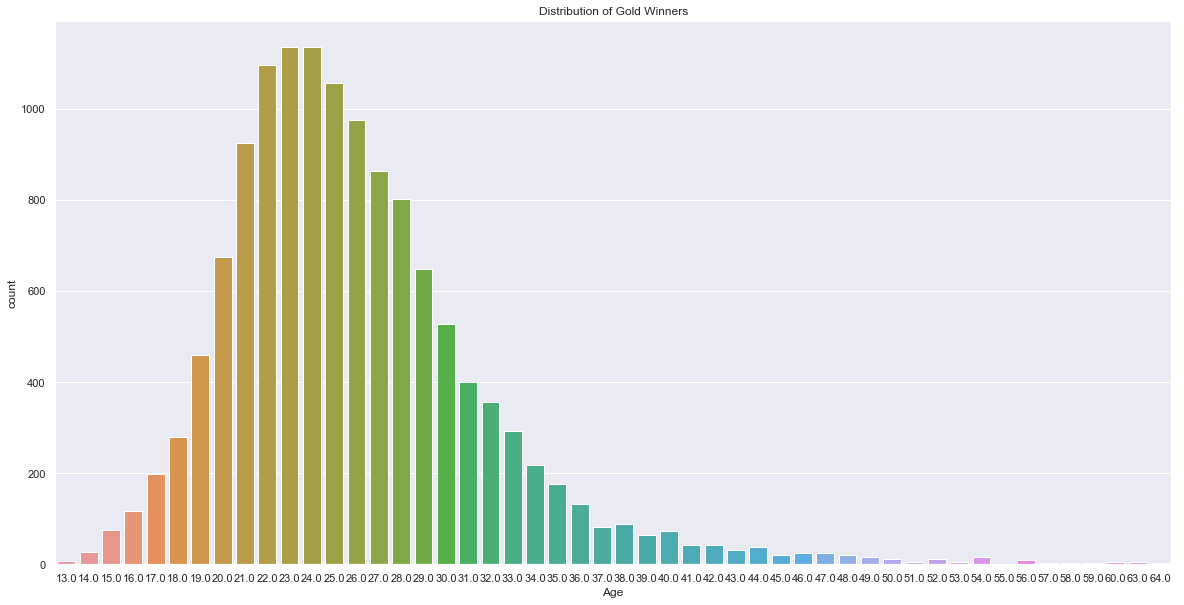

In [109]:
plt.figure(figsize=(20,10))
plt.tight_layout()
sns.countplot(goldWinners['Age'])
plt.title('Distribution of Gold Winners')

## Distribution of Age in Silver Medal Winners

 First creating a new dataframe including only silver medalists.

In [110]:
silverWinners = combined[combined['Medal']=='Silver']

Check whether there are any null instances in the age rows in Silver Medal Winners. Removing those instances by choosing only Non Null values.

In [111]:
silverWinners.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
region     True
notes      True
dtype: bool

The Distribution of Silver Winners is plotted with the null values removed.

In [112]:
silverWinners = silverWinners[np.isfinite(silverWinners['Age'])]

Text(0.5,1,'Distribution of Silver Winners')

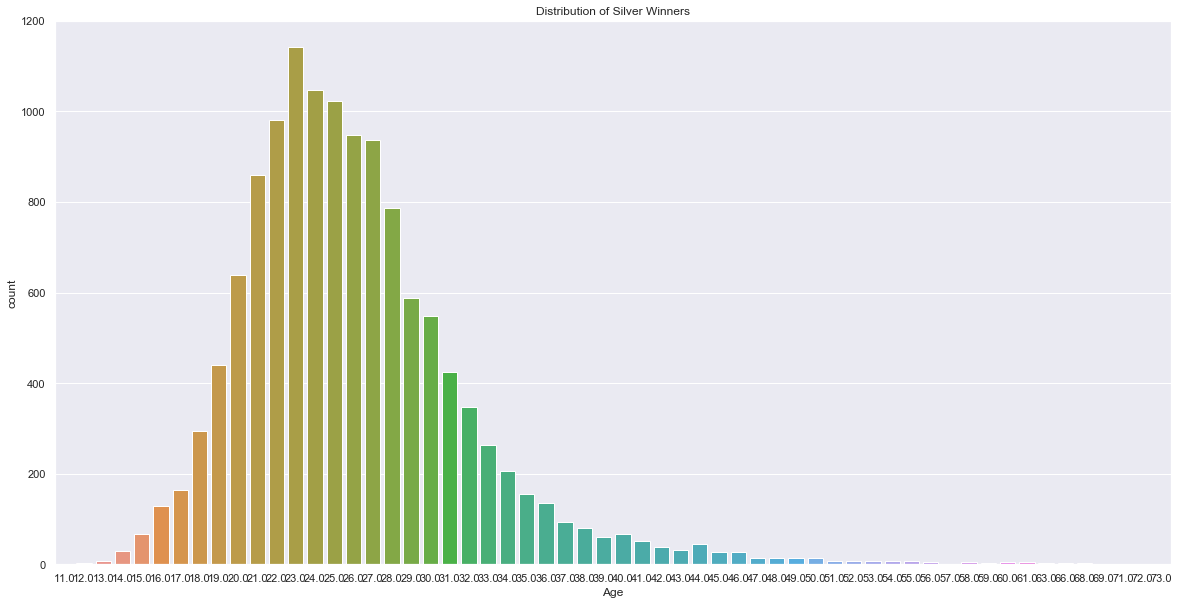

In [113]:
plt.figure(figsize=(20,10))
plt.tight_layout()
sns.countplot(silverWinners['Age'])
plt.title('Distribution of Silver Winners')

We can notice some outliers! Let's inspect which Olympians won gold medals despite being over the age of 50. Let's create a dataframe called GoldDisciples which stores the winners of Gold Medals over the age of 50. We notice that there are sixty such Gold winners.

In [114]:
goldWinners['ID'][goldWinners['Age']> 50].count()

65

In [115]:
goldDisciples = goldWinners['Sport'][goldWinners['Age']>50]

Let's make a countplot of the gold Winners over 50, by the Disciplines in which they won the medal.

Text(0.5,1,'Gold Medals for Athletes Over 50')

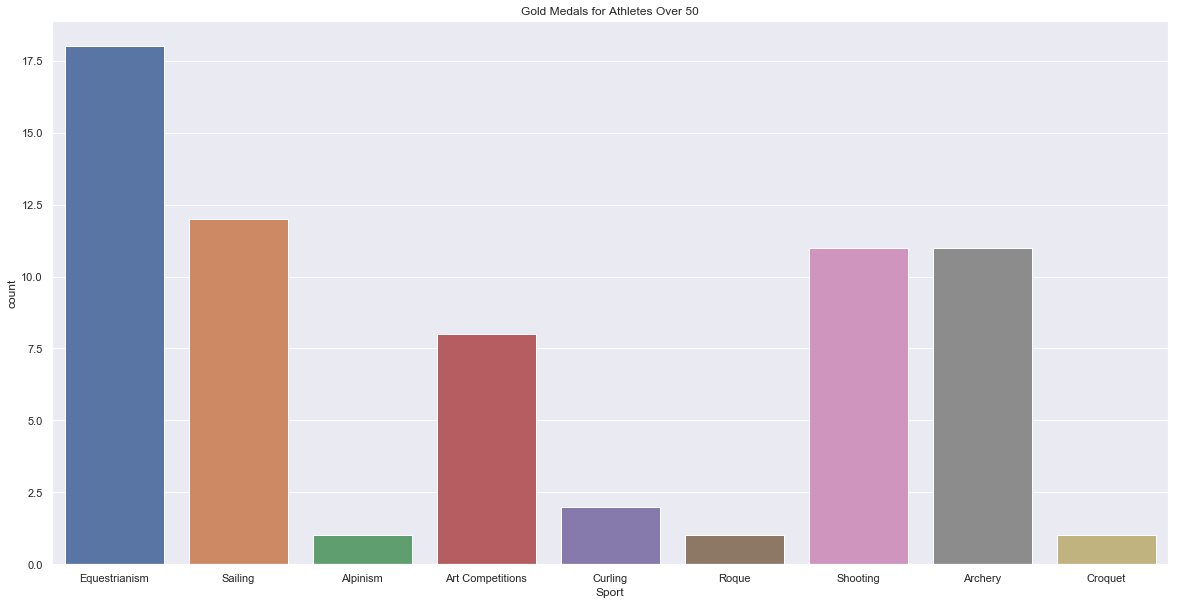

In [116]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(goldDisciples)
plt.title('Gold Medals for Athletes Over 50')

We notice that most of the disciplines are less physically taxing. Did you know Art Competitions was once a field held in the Olympics?

# Women in the Olympics

## Women in the Summer Olympics

Let's now evaluate the role of Women throughout history in the Summer Olympics. Let's create a dataframe called WomenInOlympics which combines the entries which are Female, as well as are during the Summer season of the Olympics.

In [117]:
womenInOlympics = combined[(combined.Sex=='F')&(combined.Season=='Summer')]

In [118]:
womenInOlympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN


## Medals won by Women in Summer Olympics

Let's now plot the number of medals won by women over the years in the Olympics. We notice that the number of medals won by women has exponentially increased since the early 1900's. The number of women winning medals in the Olympics was at it's all time high during the 2016 Summer Olympics.

Text(0.5,1,'Medals won by Women year by year in the Summer Olympics')

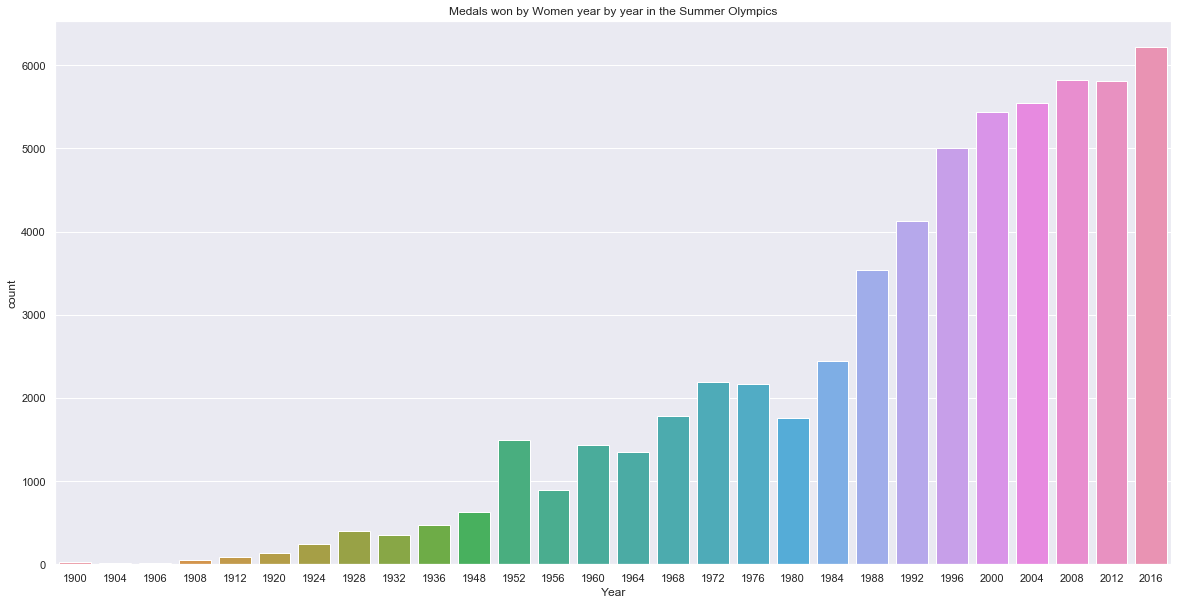

In [119]:
plt.figure(figsize=(20,10))
sns.countplot(x='Year', data=womenInOlympics)
plt.title('Medals won by Women year by year in the Summer Olympics')

## Women in the Winter Olympics

Just out of curiosity and to be have an indepth analysis, as well as the ability to compare trends across both Summer and Winter Olympics, let's not look at the participation and medals won by women in the Winter Olympics.

In [120]:
womenInWinterOlympics = combined[(combined.Sex=='F')& (combined.Season=='Winter')]

Let's create a dataframe called womenInWinterOlynpics which stores the entries which are Female, and took place in the Winter Season. 

Let's expand this dataframe and analyze it's head.

In [121]:
womenInWinterOlympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


## Medals won by Women in Winter Olympics

Let's now plot the number of medals won by women in the Winter Olympics. Here as well, we can see the exponential increase in the number of women medal winners in the Olympics. Some interesting things to note,

The medal count of the Winter Olympics (scale goes up to 2000) is much lower than that of the Summer Olympics(scale goes beyond 6000). This can be attributed to the lower number of events held, as well as the lower number of participants in the Winter games as compared to the Summer games.

Text(0.5,1,'Medals won by Women in Winter Olympics over the years')

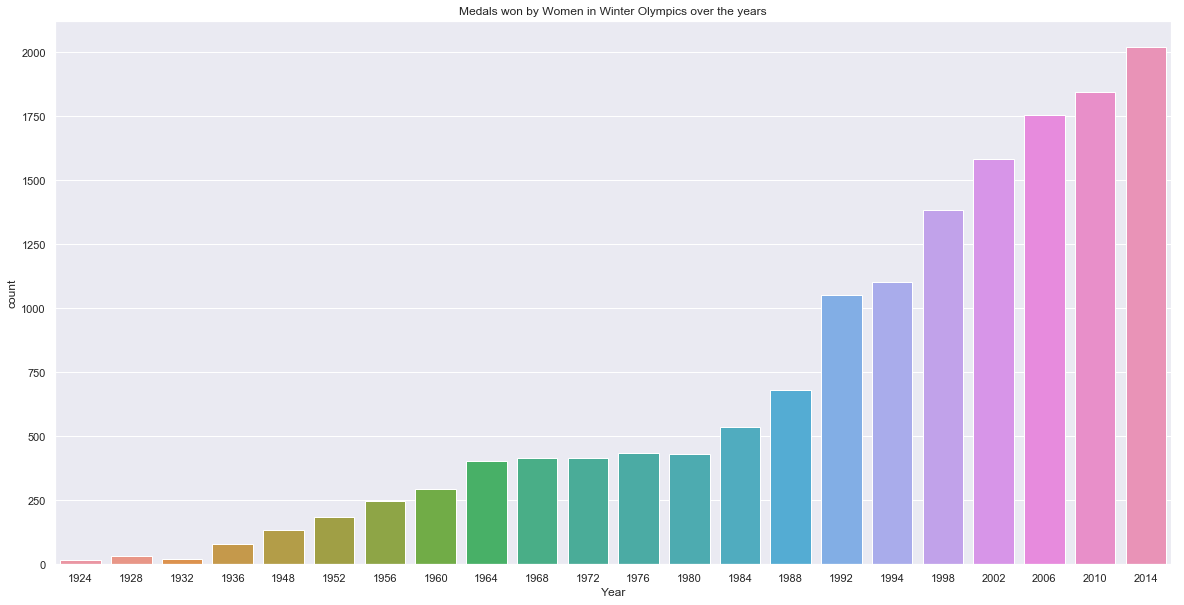

In [122]:
plt.figure(figsize=(20,10))
sns.countplot(x='Year',data=womenInWinterOlympics)
plt.title('Medals won by Women in Winter Olympics over the years')

## Discipline Analysis for Women Medal Winners in Winter Olympics

Let's plot the medal counts for women medal winners in Winter Olympics by the discipline/event the medal was won at. This will give us a clearer analysis of which disciplines traditionally have more events, as well as woman participation. Let's add an additional parameter of Medal Type and sort by Gold, Silver and Bronze Medals.


Text(0.5,1,'Analysis for Performance of Women in Winter Olympics in each Discipline')

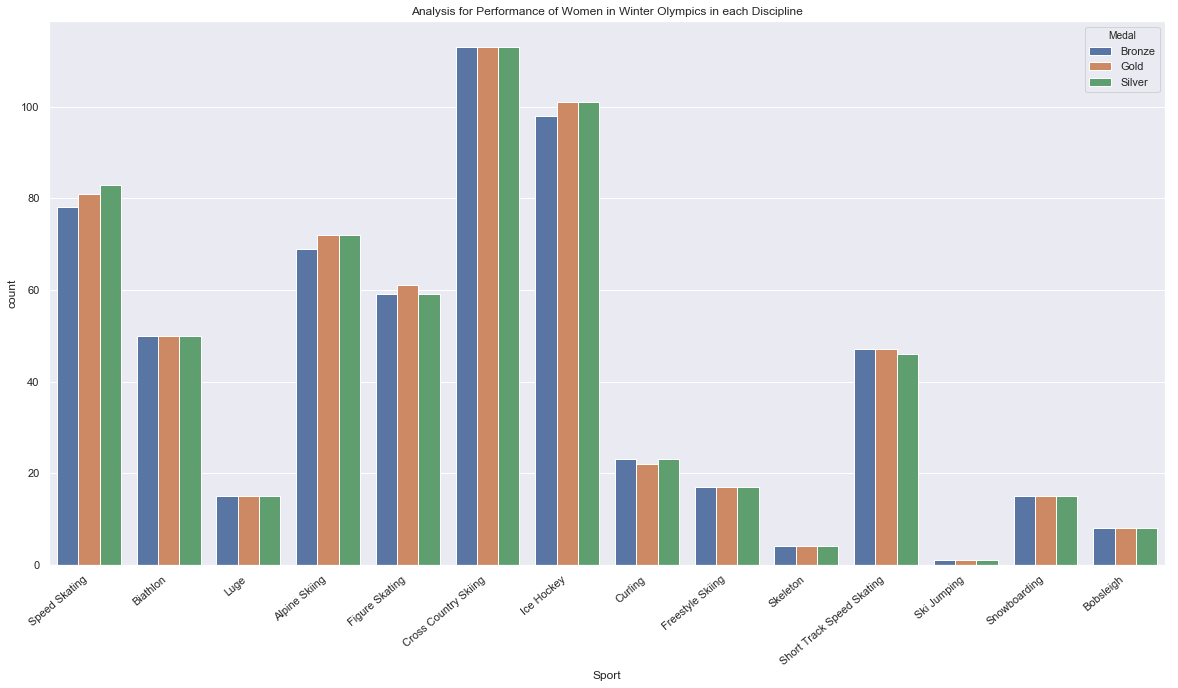

In [123]:
plt.figure(figsize=(20,10))
plt.tight_layout()
womenMedals = sns.countplot(x='Sport', hue='Medal',data=womenInWinterOlympics)
womenMedals.set_xticklabels(womenMedals.get_xticklabels(), rotation=40, ha="right")
plt.title('Analysis for Performance of Women in Winter Olympics in each Discipline')

## Discipline Analysis for Women Medal Winners in Summer Olympics

Let's plot the medal counts for women medal winners in Summer Olympics by the discipline/event the medal was won at. This will give us a clearer analysis of which disciplines traditionally have more events, as well as woman participation. Let's add an additional parameter of Medal Type and sort by Gold, Silver and Bronze Medals.

Text(0.5,1,'Analysis fo Performance of Women in Summer Olympics in each Discipline')

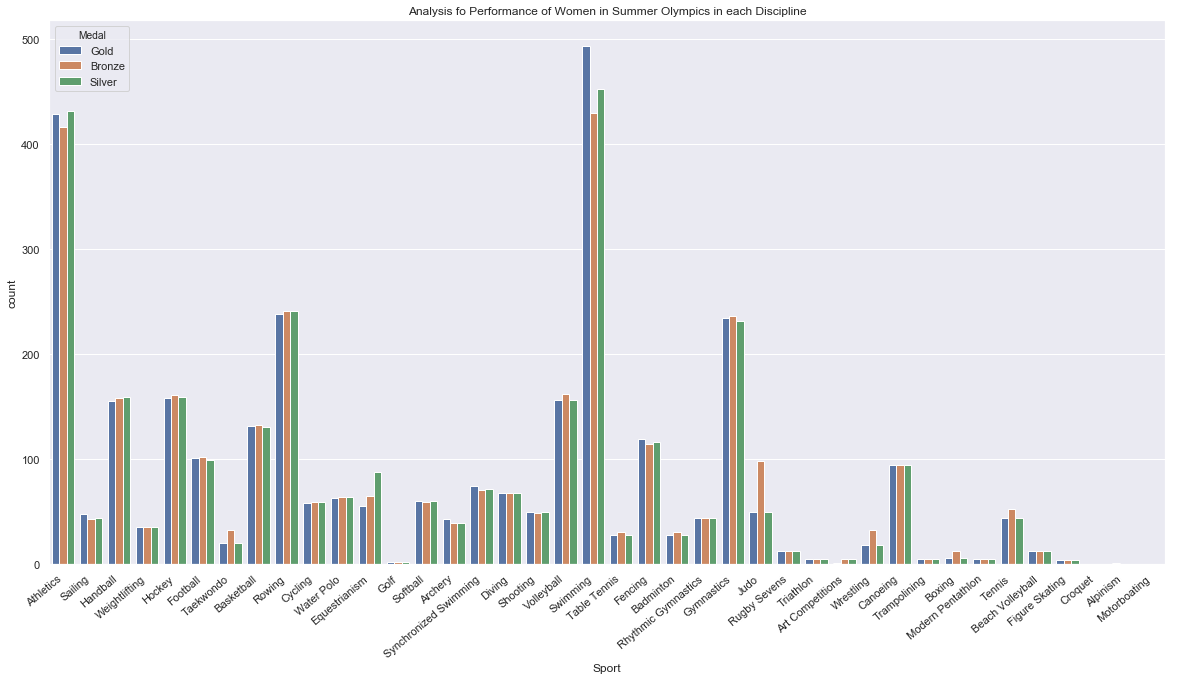

In [124]:
plt.figure(figsize=(20,10))
plt.tight_layout()
womenSummerMedals = sns.countplot(x='Sport', hue='Medal',data=womenInOlympics)
womenSummerMedals.set_xticklabels(womenSummerMedals.get_xticklabels(), rotation=40, ha="right")
plt.title('Analysis fo Performance of Women in Summer Olympics in each Discipline')

## Total Gold Medals won by each Country

Now let's sort analyze which countries have traditionally have had the most success in the Olympics. Let's create a dataframe totalGoldWinners which sorts the gold medal winners by their region. For our analysis let's only factor in Gold Medals, and not other Silver or Bronze medal winners. 

In [125]:
totalGoldWinners = goldWinners.region.value_counts().reset_index(name='Medal').head(5)

In [126]:
totalGoldWinners

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567


Text(0.5,1,'Medals per Country')

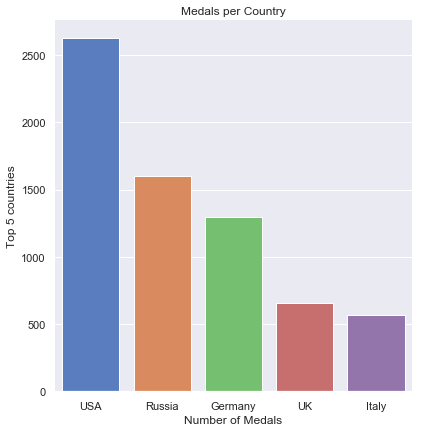

In [127]:
totalGoldMedals = goldWinners.region.value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x="index", y="Medal", data=totalGoldWinners,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Top 5 countries")
g.set_xlabels("Number of Medals")
plt.title('Medals per Country')

We can see that the top three countries in Medal counts are USA, Russia and Germany. The United States in particular maintains a hefty lead over the country below it. Let's analyze their medal counts in more detail, to see which disciplines of the Olympics, the USA excels in. 

In [128]:
goldMedalsUSA = goldWinners.loc[goldWinners['NOC']=='USA']

In [129]:
goldMedalsUSA.Event.value_counts().reset_index(name='Medal').head(10)

,index,Medal
0,Basketball Men's Basketball,186
1,Swimming Men's 4 x 200 metres Freestyle Relay,111
2,Swimming Men's 4 x 100 metres Medley Relay,108
3,Rowing Men's Coxed Eights,107
4,Basketball Women's Basketball,95
5,Athletics Men's 4 x 400 metres Relay,81
6,Swimming Women's 4 x 100 metres Medley Relay,79
7,Swimming Women's 4 x 100 metres Freestyle Relay,78
8,Football Women's Football,66
9,Athletics Men's 4 x 100 metres Relay,63


Here we can see that the United States has won a large segment of its medals from the sports of Basketball, Swimming and Athletics. 

In [130]:
goldWinners.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


## Analysis of Median Height and Weight of Olympic Athletes

Let's try to plot a scatterplot of height vs weight to see the distribution of values (without grouping by discipline).

We will now create a dataframe filtering only the rows that has the column Height and Weight populated.

In [131]:
notNullMedals = goldWinners[(goldWinners['Height'].notnull()) & (goldWinners['Weight'].notnull())]

In [132]:
notNullMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


We can see that we have NaN values both in height and weight columns.

At this point, we can act as follows:

Using only the rows that has a value in the Height and Weight columns;
Replace the value with the mean of the column.
Solution 2 in my opinion it is not the best way to go: we are talking about data of athletes of different ages and different disciplines (that have done different training).

Let's go with solution 1.

For this figure, let's add an aditional feature to sort the height and weight by, and add a hue of 'Sex' on the distribution. This will enable us to analyze the height and weight of both genders. 

Text(0.5,1,'Height vs Weight of Olympic Medalists')

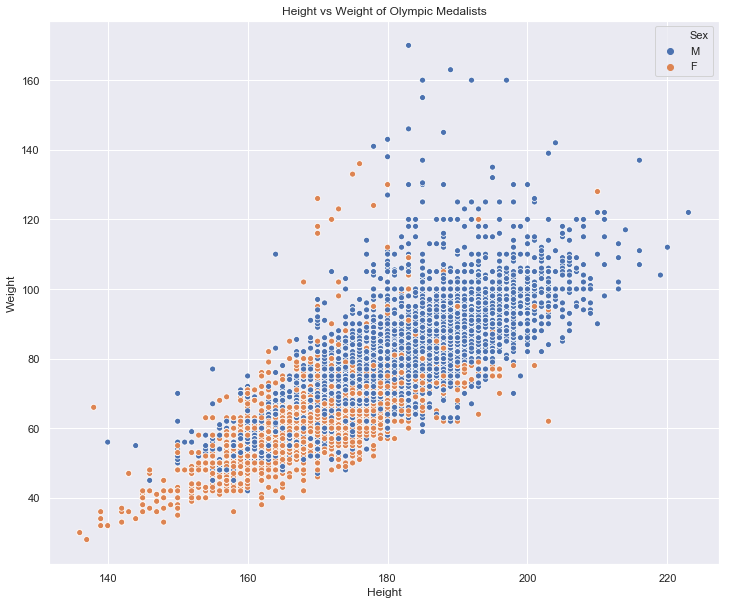

In [133]:
plt.figure(figsize=(12, 10))
ax = sns.scatterplot(x="Height", y="Weight", data=notNullMedals, hue='Sex')
plt.title('Height vs Weight of Olympic Medalists')

The vast majority of the samples show a linear relation between height and weight (the more the weight, the more the height).

We have exceptions and I am willing to know more!

For example, let's see which is the athlete that weighs more than 160 kilograms.

In [134]:
notNullMedals.loc[notNullMedals['Weight']>160]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
39181,20144,Andrey Ivanovich Chemerkin,M,24.0,183.0,170.0,Russia,RUS,1996 Summer,1996,Summer,Atlanta,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Russia,NaN
268659,134407,Leonid Ivanovych Zhabotynskiy,M,26.0,189.0,163.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Weightlifting,Weightlifting Men's Heavyweight,Gold,Russia,NaN
268660,134407,Leonid Ivanovych Zhabotynskiy,M,30.0,189.0,163.0,Soviet Union,URS,1968 Summer,1968,Summer,Mexico City,Weightlifting,Weightlifting Men's Heavyweight,Gold,Russia,NaN


Now let's see which is the athlete that weighs less than 40 kilograms.

In [135]:
notNullMedals.loc[notNullMedals['Weight']<40]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
12780,6955,Svetlana Nikolayevna Baitova,F,16.0,152.0,39.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Gymnastics,Gymnastics Women's Team All-Around,Gold,Russia,NaN
13741,7444,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004 Summer,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold,Romania,NaN
23763,12485,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold,Romania,NaN
33267,17140,Nuria Cabanillas Provencio,F,15.0,162.0,38.0,Spain,ESP,1996 Summer,1996,Summer,Atlanta,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,Gold,Spain,NaN
47452,24456,Laura Cutina,F,15.0,143.0,36.0,Romania,ROU,1984 Summer,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold,Romania,NaN
53751,27569,Deng Linlin,F,16.0,144.0,34.0,China,CHN,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Gold,China,NaN
53759,27569,Deng Linlin,F,20.0,144.0,34.0,China,CHN,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Women's Balance Beam,Gold,China,NaN
64162,32860,Alexandra Georgiana Maria Eremia,F,17.0,149.0,38.0,Romania,ROU,2004 Summer,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold,Romania,NaN
69216,35292,Mariya Yevgenyevna Filatova (-Kurbatova),F,14.0,136.0,30.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Gymnastics,Gymnastics Women's Team All-Around,Gold,Russia,NaN
69222,35292,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,Gold,Russia,NaN



## Evolution of Olympics over Time

We will now try to answer the following questions:

How the number of athletes/countries varied along time ?
How the proportion of Men/Women varied with time ?
How about mean age, weight and height along time ?


## Variation of Men/Women over Time in the Olympics

In [136]:
MenOverTime = combined[(combined.Sex=='M')&(combined.Season=='Summer')]
WomenOverTime = combined[(combined.Sex=='F')&(combined.Season=='Summer')]

In [137]:
MenOverTime.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,Finland,NaN


Text(0.5,1,'Variation of Male Athletes over time')

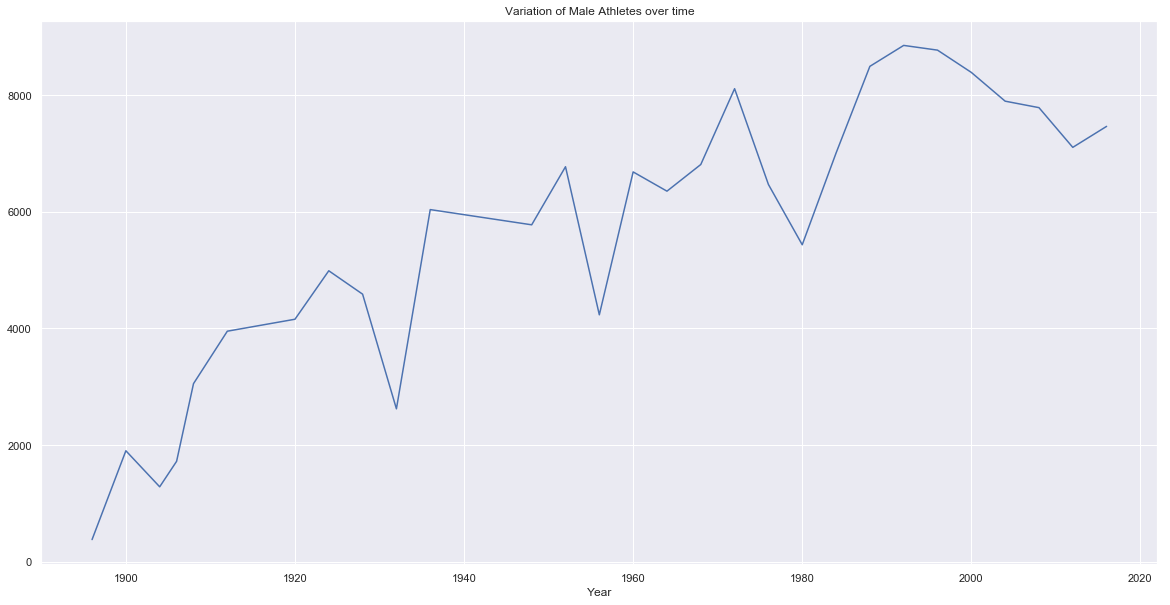

In [138]:
part = MenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'M'].plot()
plt.title('Variation of Male Athletes over time')

Text(0.5,1,'Variation of Female Athletes over time')

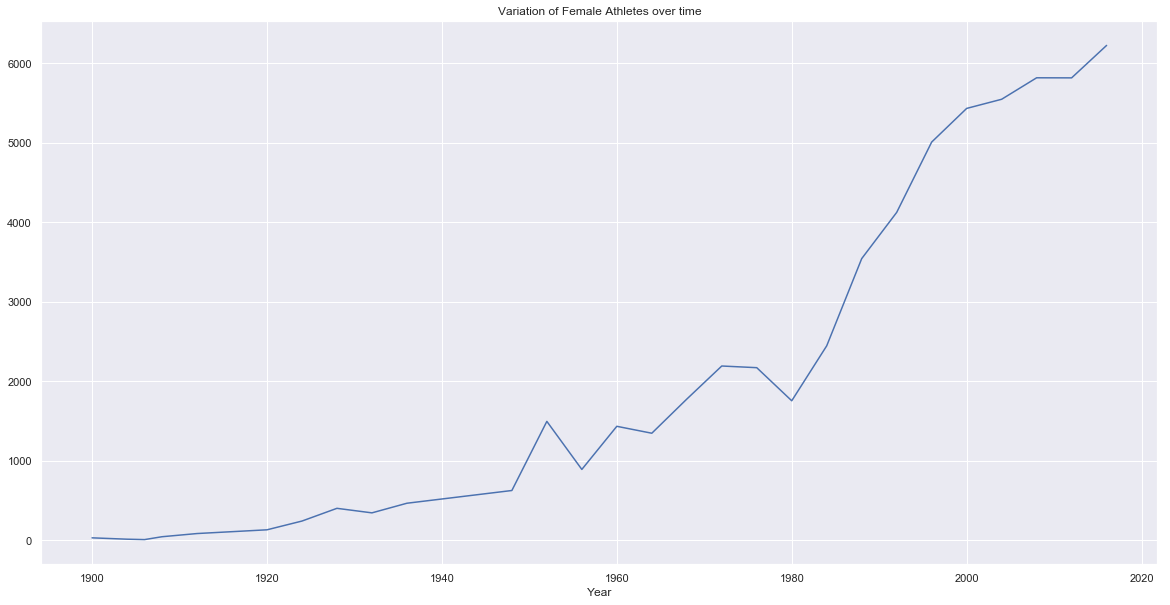

In [139]:
part = WomenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'F'].plot()
plt.title('Variation of Female Athletes over time')

What we can immediately see is that for women:

We have a steep increase in the population;
The grow is constant.
On the other hand, the growth for men seems less strong:

After the 1990 we can see a relevant decrease in the number of male athletes at the summer games;
The growth has slowly restarted recently.

## Variation of Age along Time

Another really interesting question can be: "How the age of the athletes has changed over time?"

Let's use a box plot: In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles.

Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram.

Outliers may be plotted as individual points. Box plots are non-parametric: they display variation in samples of a statistical population without making any assumptions of the underlying statistical distribution.

The spacings between the different parts of the box indicate the degree of dispersion (spread) and skewness in the data, and show outliers.

In addition to the points themselves, they allow one to visually estimate various L-estimators, notably the interquartile range, midhinge, range, mid-range, and trimean.

Box plots can be drawn either horizontally or vertically. Box plots received their name from the box in the middle.

Text(0.5,1,'Variation of Age for Male Athletes over time')

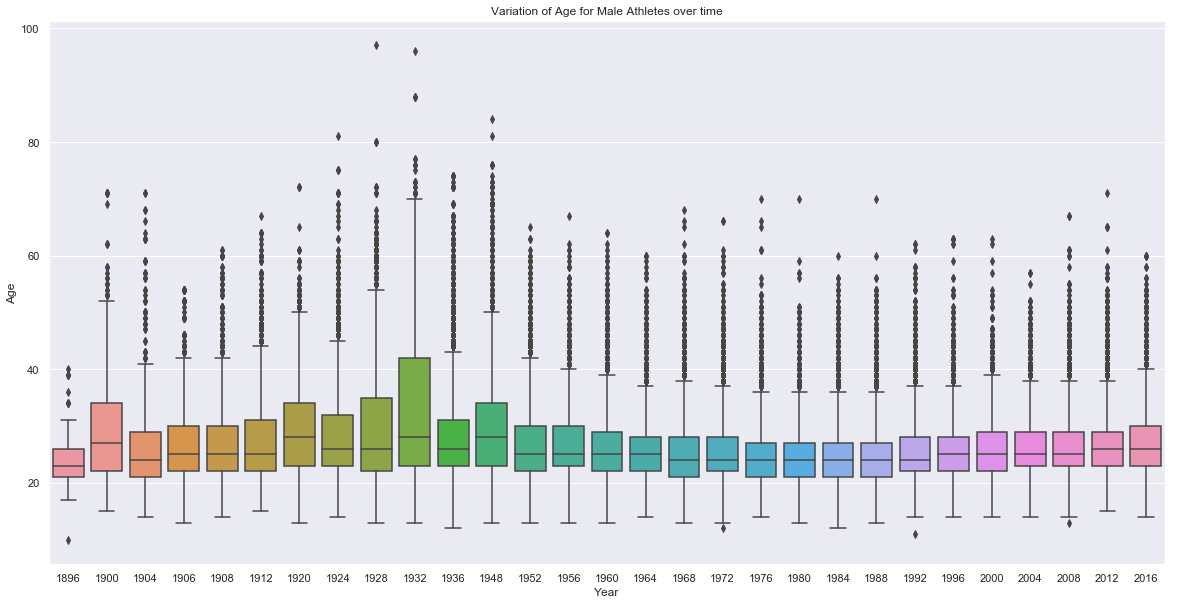

In [140]:
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Age', data=MenOverTime)
plt.title('Variation of Age for Male Athletes over time')

What is strange for me is the age of some athletes in the games between the 1924 and the 1948: let's check all the people with age greater than 80.

In [141]:
MenOverTime.loc[MenOverTime['Age'] > 80].head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
9371,5146,George Denholm Armour,M,84.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,UK,NaN
60861,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
60862,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
60863,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
98118,49663,Winslow Homer,M,96.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
154855,77710,Robert Tait McKenzie,M,81.0,NaN,NaN,Canada,CAN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN,Canada,NaN
236912,118789,Louis Tauzin,M,81.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN,France,NaN
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,USA,NaN


To be honest, I did not know that the Olympics included Art Competitions!

After a brief research, I discovered more: Art competitions formed part of the modern Olympic Games during its early years, from 1912 to 1948. The competitions were part of the original intention of the Olympic Movement's founder, Pierre de Frédy, Baron de Coubertin. Medals were awarded for works of art inspired by sport, divided into five categories: architecture, literature, music, painting, and sculpture.

Text(0.5,1,'Variation of Age for Female Athletes over time')

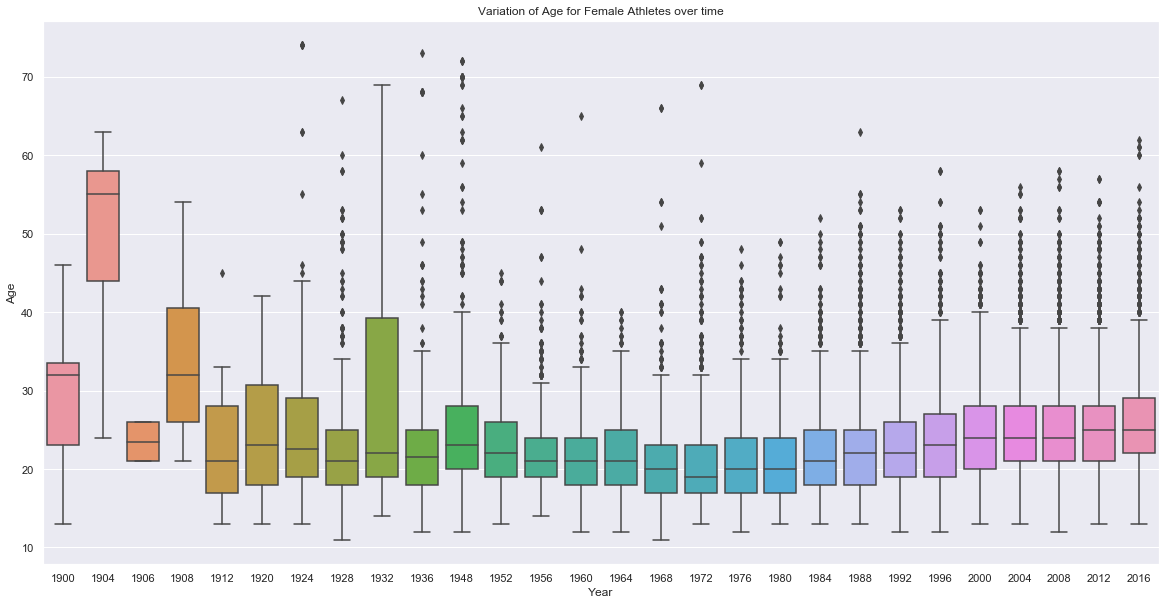

In [142]:
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Age', data=WomenOverTime)
plt.title('Variation of Age for Female Athletes over time')

In [143]:
WomenOverTime.loc[WomenOverTime['Year'] == 1904]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
44365,22877,Emma C. Cooke,F,55.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Silver,USA,NaN
44366,22877,Emma C. Cooke,F,55.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Silver,USA,NaN
99506,50366,"Matilda ""Lida"" Howell (Scott-)",F,44.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Gold,USA,NaN
99507,50366,"Matilda ""Lida"" Howell (Scott-)",F,44.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Gold,USA,NaN
99508,50366,"Matilda ""Lida"" Howell (Scott-)",F,44.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold,USA,NaN
190950,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Bronze,USA,NaN
190951,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Bronze,USA,NaN
190952,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold,USA,NaN
237131,118921,"Leonora Josephine ""Leonie"" Taylor",F,NaN,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,NaN,USA,NaN
237132,118921,"Leonora Josephine ""Leonie"" Taylor",F,NaN,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,NaN,USA,NaN


## Variation of Weight over Time

We will now try using a pointplot to visualize the variation in weight over athletes.

The first graph will show data for men, the second for women:

Text(0.5,1,'Variation of Weight for Male Athletes over time')

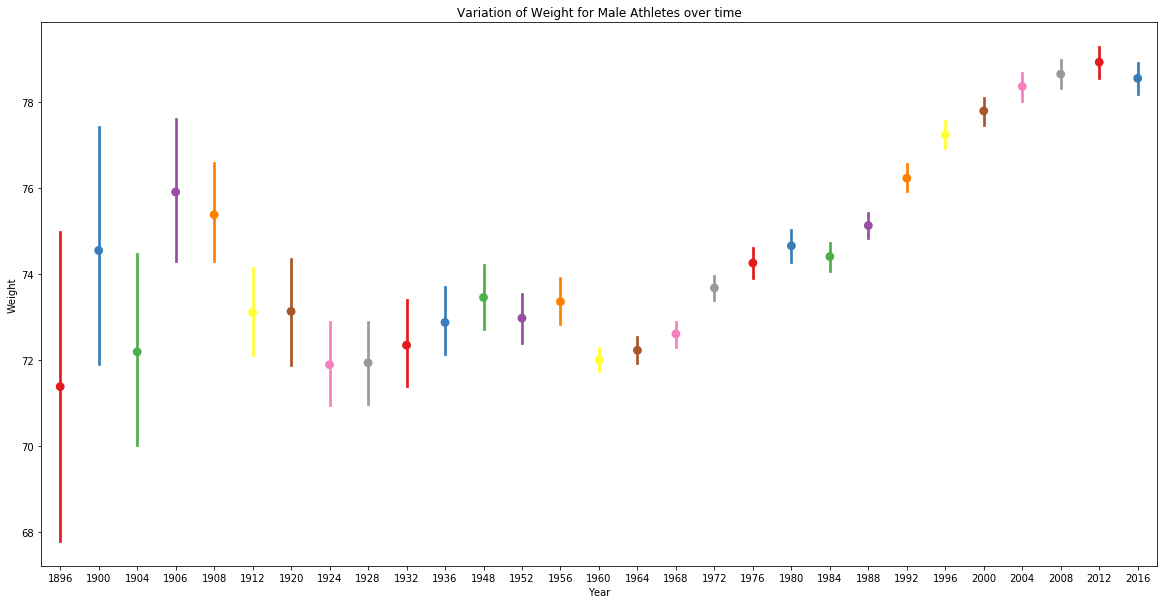

In [63]:
plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Weight', data=MenOverTime,palette='Set1')
plt.title('Variation of Weight for Male Athletes over time')

Text(0.5,1,'Variation of Weight of Female Athlets over time')

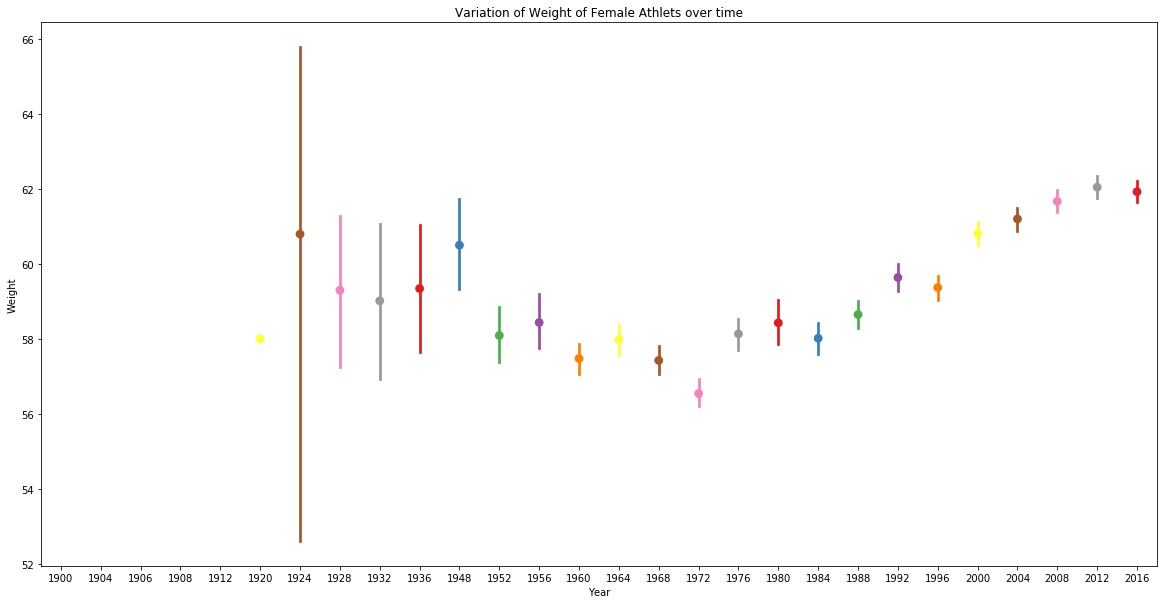

In [61]:
plt.figure(figsize=(20,10))
sns.pointplot('Year','Weight',data=WomenOverTime,palette='Set1')
plt.title('Variation of Weight of Female Athlets over time')

What we can see is that it seems that we do not have data for women before 1924.

Let's try filtering all the women athletes for that period to review this point:

In [144]:
womenInOlympics.loc[womenInOlympics['Year'] < 1924].head(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA,NaN
284,151,Mary Perkins Ives Abbott (Perkins-),F,42.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN,USA,NaN
1738,968,"Margarete ""Grete"" Adler",F,16.0,NaN,NaN,Austria,AUT,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Women's 100 metres Freestyle,NaN,Austria,NaN
1739,968,"Margarete ""Grete"" Adler",F,16.0,NaN,NaN,Austria,AUT,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Bronze,Austria,NaN
1756,975,Anna Mrtha Vilhelmina Adlerstrhle (von Oelreich-),F,39.0,NaN,NaN,Sweden,SWE,1908 Summer,1908,Summer,London,Tennis,"Tennis Women's Singles, Covered Courts",Bronze,Sweden,NaN
1768,978,Mrta Elvira Adlerz (-Hermansson),F,15.0,NaN,NaN,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Diving,Diving Women's Plain High,NaN,Sweden,NaN
1769,978,Mrta Elvira Adlerz (-Hermansson),F,23.0,NaN,NaN,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Diving,Diving Women's Plain High,NaN,Sweden,NaN
2749,1531,Frances Helen Aitchison (-Leisk),F,30.0,NaN,NaN,Great Britain-1,GBR,1912 Summer,1912,Summer,Stockholm,Tennis,"Tennis Mixed Doubles, Covered Courts",Silver,UK,NaN
2750,1531,Frances Helen Aitchison (-Leisk),F,30.0,NaN,NaN,Great Britain,GBR,1912 Summer,1912,Summer,Stockholm,Tennis,"Tennis Women's Singles, Covered Courts",NaN,UK,NaN
4963,2830,Mary Aileen Allen (Conquest-),F,31.0,157.0,NaN,United States,USA,1920 Summer,1920,Summer,Antwerpen,Diving,Diving Women's Springboard,NaN,USA,NaN


Okay, the first values seems all NaN (Not a number) so the information is correct.

## Variation of Height with Time

Using the same pointplot (with a different palette) we can plot the weight change along time.

The first graph will show the information for men, the second for women:

Text(0.5,1,'Variation of Height for Male Athletes over Time')

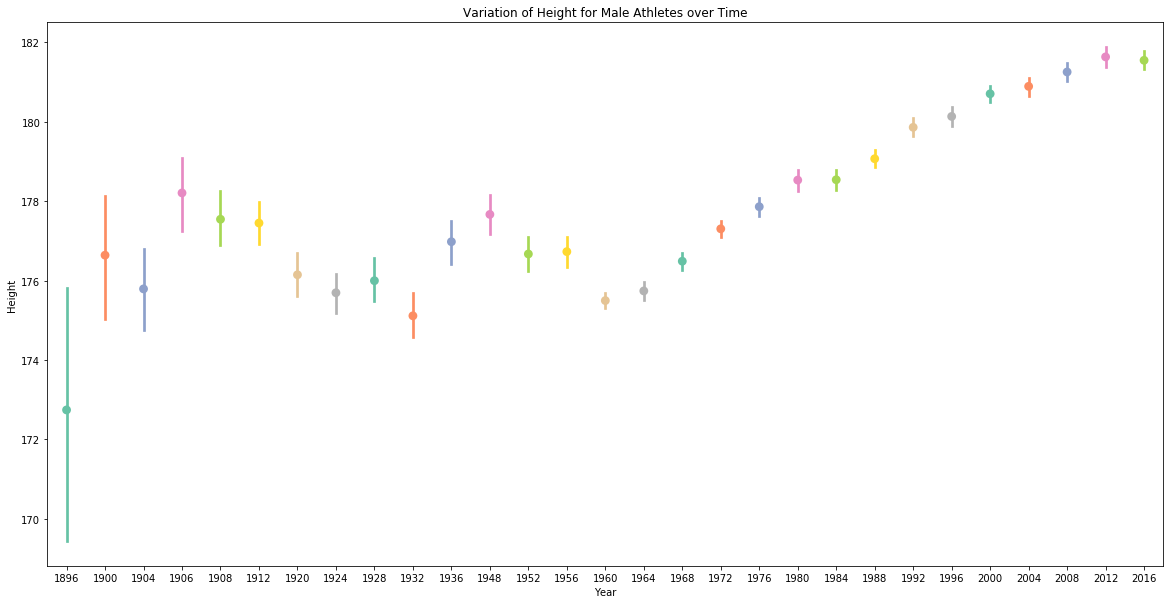

In [60]:
plt.figure(figsize=(20,10))
sns.pointplot('Year','Height',data=MenOverTime,palette='Set2')
plt.title('Variation of Height for Male Athletes over Time')

Text(0.5,1,'Variation of Height for Female Athletes over Time')

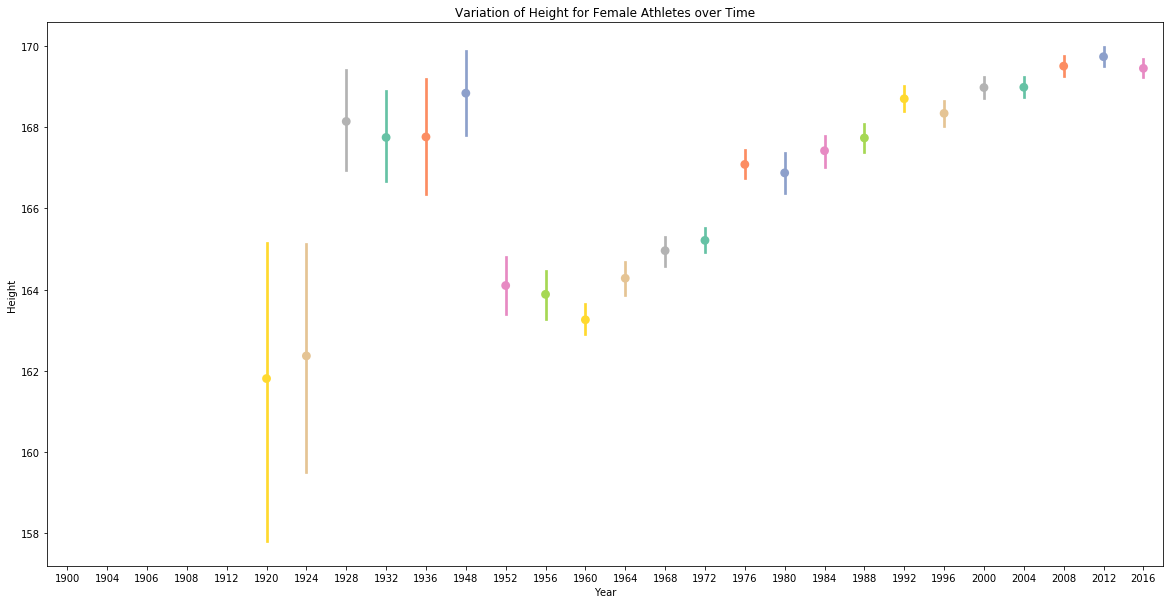

In [59]:
plt.figure(figsize=(20,10))
sns.pointplot('Year','Height',data=WomenOverTime,palette='Set2')
plt.title('Variation of Height for Female Athletes over Time')

In [64]:
WomenOverTime[WomenOverTime['Year']==1948]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
731,419,Majken berg,F,30.0,170.0,60.0,Sweden,SWE,1948 Summer,1948,Summer,London,Athletics,Athletics Women's Discus Throw,NaN,Sweden,NaN
1571,875,Jenny Marie Beatrice Addams,F,39.0,NaN,NaN,Belgium,BEL,1948 Summer,1948,Summer,London,Fencing,"Fencing Women's Foil, Individual",NaN,Belgium,NaN
2408,1349,Elisabeth Ulla Johanna kesdotter Ahlgren (-Bor...,F,23.0,NaN,NaN,Sweden,SWE,1948 Summer,1948,Summer,London,Swimming,Swimming Women's 100 metres Freestyle,NaN,Sweden,NaN
2409,1349,Elisabeth Ulla Johanna kesdotter Ahlgren (-Bor...,F,23.0,NaN,NaN,Sweden,SWE,1948 Summer,1948,Summer,London,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,NaN,Sweden,NaN
2703,1505,Joan Winnifred Airey (-Weedon),F,22.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Women's Team All-Around,NaN,UK,NaN
5309,3007,Ingrid Margareta Almqvist,F,20.0,162.0,57.0,Sweden,SWE,1948 Summer,1948,Summer,London,Athletics,Athletics Women's Javelin Throw,NaN,Sweden,NaN
6652,3725,"Greta Marie Andersen (-Sonnichsen, -Veress)",F,21.0,NaN,NaN,Denmark,DEN,1948 Summer,1948,Summer,London,Swimming,Swimming Women's 100 metres Freestyle,Gold,Denmark,NaN
6653,3725,"Greta Marie Andersen (-Sonnichsen, -Veress)",F,21.0,NaN,NaN,Denmark,DEN,1948 Summer,1948,Summer,London,Swimming,Swimming Women's 400 metres Freestyle,NaN,Denmark,NaN
6654,3725,"Greta Marie Andersen (-Sonnichsen, -Veress)",F,21.0,NaN,NaN,Denmark,DEN,1948 Summer,1948,Summer,London,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Silver,Denmark,NaN
7002,3928,Elsa Ingrid Andersson (-Wallin),F,24.0,NaN,NaN,Sweden,SWE,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Women's Team All-Around,NaN,Sweden,NaN


## Analysis of India in Olympics

Let us now analyze the participation and success of India as a country in the Summer Olympics over time and across genders.

In [66]:
inMenOverTime = MenOverTime.loc[MenOverTime['region']=='India']

In [67]:
inMenOverTime

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
1183,663,Sharath Kamal Achanta,M,22.0,186.0,85.0,India,IND,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Men's Singles,NaN,India,NaN
1184,663,Sharath Kamal Achanta,M,26.0,186.0,85.0,India,IND,2008 Summer,2008,Summer,Beijing,Table Tennis,Table Tennis Men's Singles,NaN,India,NaN
1185,663,Sharath Kamal Achanta,M,34.0,186.0,85.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Table Tennis,Table Tennis Men's Singles,NaN,India,NaN
1710,952,Badathala Adisekhar,M,28.0,NaN,53.0,India,IND,1992 Summer,1992,Summer,Barcelona,Weightlifting,Weightlifting Men's Flyweight,NaN,India,NaN
1711,952,Badathala Adisekhar,M,32.0,NaN,53.0,India,IND,1996 Summer,1996,Summer,Atlanta,Weightlifting,Weightlifting Men's Flyweight,NaN,India,NaN
1998,1105,Mirza Najib Aga,M,19.0,NaN,NaN,India,IND,1996 Summer,1996,Summer,Atlanta,Judo,Judo Men's Half-Lightweight,NaN,India,NaN
2383,1331,Jahan Ahir,M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Water Polo,Water Polo Men's Water Polo,NaN,India,NaN
2441,1366,Jitendarjit Singh Ahluwalia,M,25.0,179.0,69.0,India,IND,1980 Summer,1980,Summer,Moskva,Equestrianism,"Equestrianism Mixed Three-Day Event, Individual",NaN,India,NaN


## Medal Counts for India

Lets now count the number of gold, silver and bronze medals won by India throughout the years.

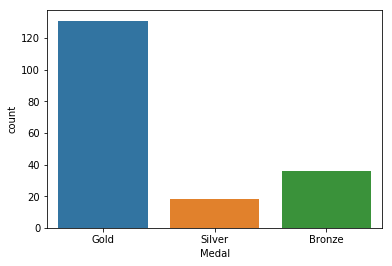

In [71]:
sns.countplot('Medal',data=inMenOverTime)

## Discipline Analysis for Medal Counts for India for Men

This analysis paints an interesting and stark picture of India's performance in the Olympics. Excellence in the sports of Hockey, with not many medals won anywhere else. 

Text(0.5,1,'Analysis of Performance of India in Summer Olympics in each Discipline')

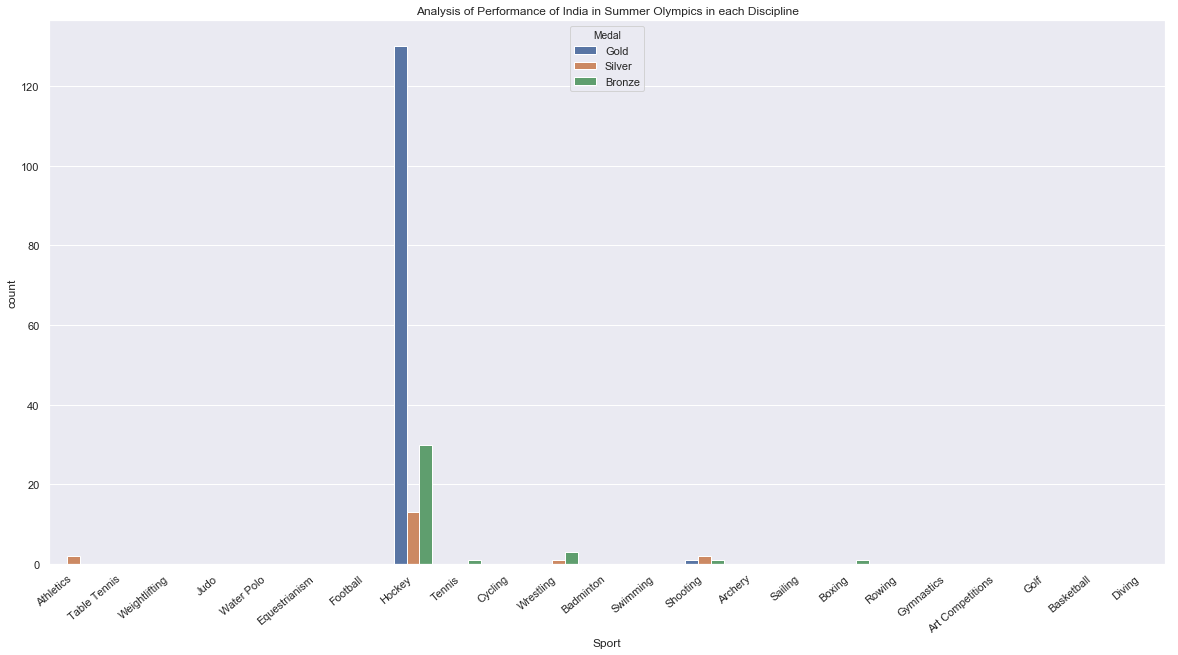

In [147]:
plt.figure(figsize=(20,10))
plt.tight_layout()
inSummerMedals = sns.countplot(x='Sport', hue='Medal',data=inMenOverTime)
inSummerMedals.set_xticklabels(inSummerMedals.get_xticklabels(), rotation=40, ha="right")
plt.title('Analysis of Performance of India in Summer Olympics in each Discipline')

## Variation of Number of Indian Male Athletes over Time

Text(0.5,1,'Variation of Number for Indian Male Athletes over time')

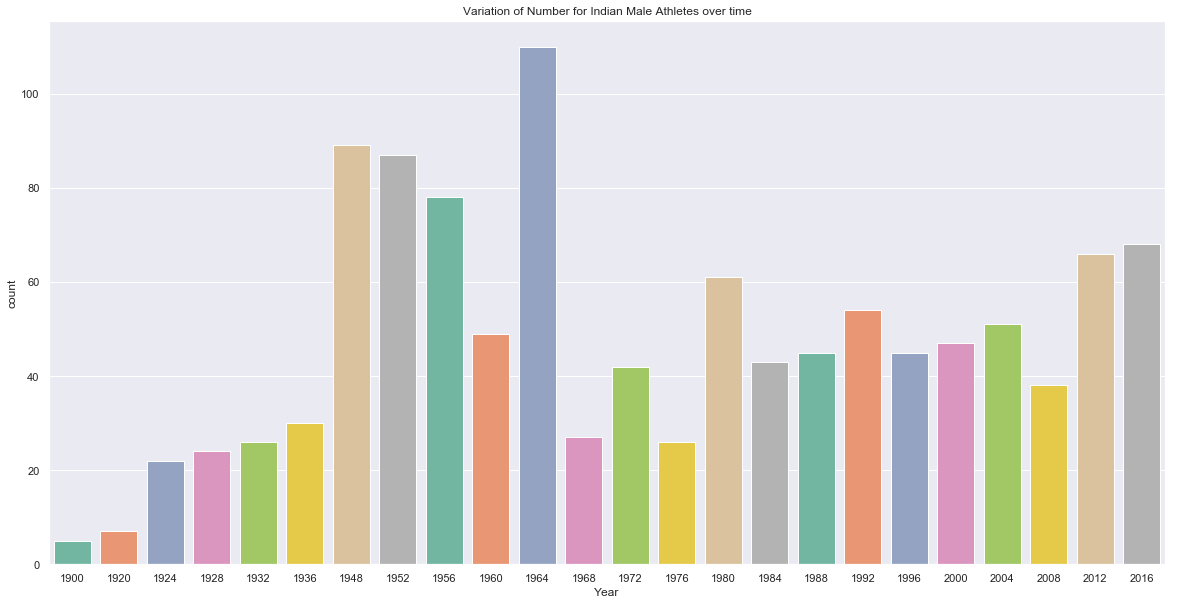

In [73]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=inMenOverTime, palette='Set2')
plt.title('Variation of Number for Indian Male Athletes over time')

## Variation of Number of Indian Female Athletes over Time

In [76]:
inWomenOverTime = WomenOverTime.loc[WomenOverTime['region']=='India']

In [77]:
inWomenOverTime

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN
898,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
899,512,Shiny Kurisingal Abraham-Wilson,F,27.0,167.0,53.0,India,IND,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Women's 800 metres,NaN,India,NaN
900,512,Shiny Kurisingal Abraham-Wilson,F,31.0,167.0,53.0,India,IND,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
2070,1149,Neha Aggarwal,F,18.0,170.0,67.0,India,IND,2008 Summer,2008,Summer,Beijing,Table Tennis,Table Tennis Women's Singles,NaN,India,NaN
5387,3053,Bobby Aloysius,F,30.0,173.0,55.0,India,IND,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's High Jump,NaN,India,NaN
8199,4523,Seema Antil,F,21.0,182.0,92.0,India,IND,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Discus Throw,NaN,India,NaN
8200,4523,Seema Antil,F,28.0,182.0,92.0,India,IND,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Discus Throw,NaN,India,NaN


Text(0.5,1,'Variation of Number for Indian Female Athletes over time')

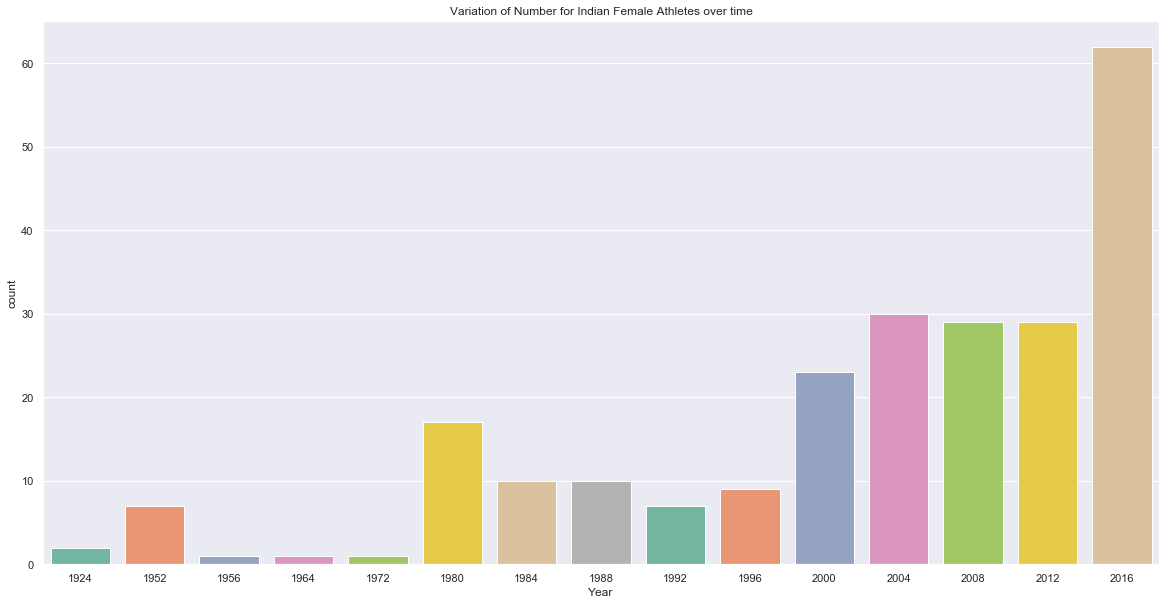

In [79]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=inWomenOverTime, palette='Set2')
plt.title('Variation of Number for Indian Female Athletes over time')

Here we can see the participation of Indian women has exponentially increased with 2016 representing the largest continent of women participants from India since the 1900s. 

## Variation of Height for Indian Male Athletes

Text(0.5,1,'Variation of Height for Indian Male Athletes over time')

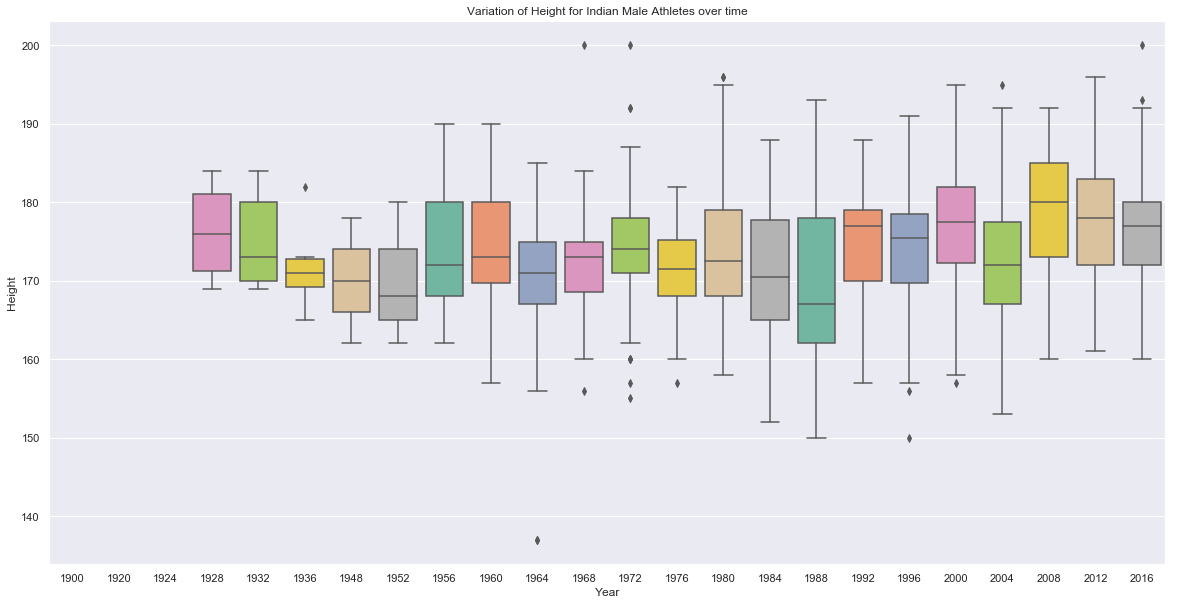

In [81]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.boxplot(x='Year',y='Height', data=inMenOverTime, palette='Set2')
plt.title('Variation of Height for Indian Male Athletes over time')

## Variation of Height for Indian Female Athletes over Time

Text(0.5,1,'Variation of Height for Indian Female Athletes over time')

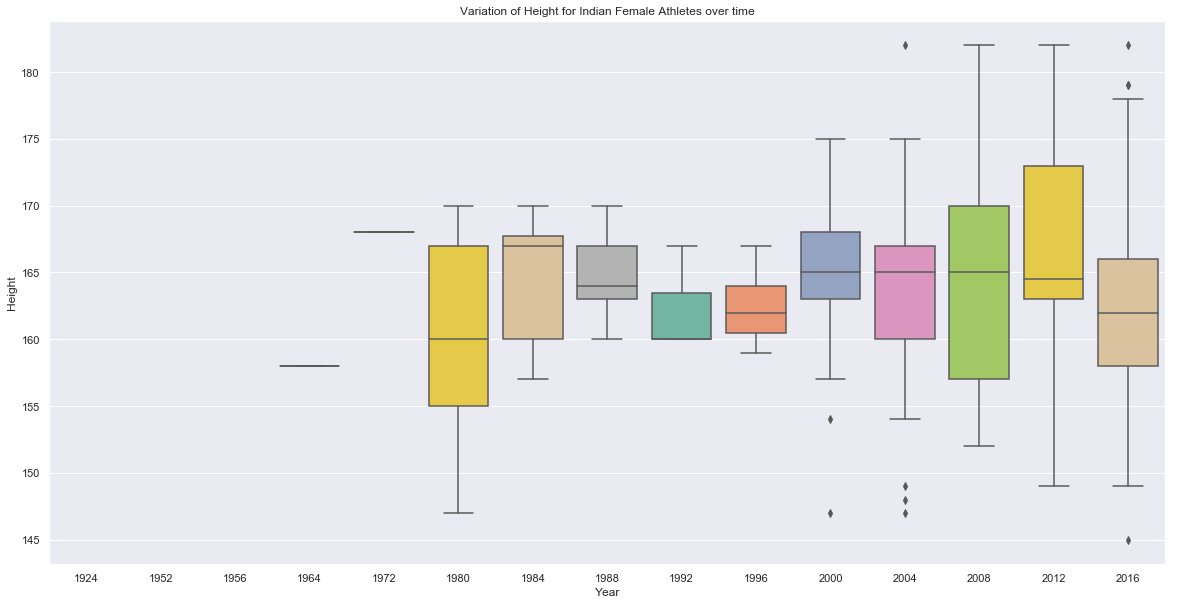

In [82]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.boxplot(x='Year',y='Height', data=inWomenOverTime, palette='Set2')
plt.title('Variation of Height for Indian Female Athletes over time')